Question 1


In [1]:
#Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
file_name = 'ingredient.csv'
df = pd.read_csv(file_name)
df.head()  # To display first 5 rows of the data

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [3]:
# Use to check the shape of the data (rows, columns)
df.shape 

(214, 9)

In [4]:
missing_data = df.isnull()   ## To check whether the missing data exist or not
missing_data.head()

,a,b,c,d,e,f,g,h,i
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [5]:
for column in missing_data.columns.values.tolist():  # use For loop to check the missing data count in the column
    print(column)
    print (missing_data[column].value_counts())
    print("") 

a
False    214
Name: a, dtype: int64

b
False    214
Name: b, dtype: int64

c
False    214
Name: c, dtype: int64

d
False    214
Name: d, dtype: int64

e
False    214
Name: e, dtype: int64

f
False    214
Name: f, dtype: int64

g
False    214
Name: g, dtype: int64

h
False    214
Name: h, dtype: int64

i
False    214
Name: i, dtype: int64



Based on the summary above, there is NO missing value in this ingredient dataset.

In [6]:
print(df.dtypes)

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
dtype: object


Based on the result above, all the variables are in float data type 

In [7]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


The summary above shows the descriptive analysis of the data.

Let's analyse the distribution of the data

In [8]:
df.skew(axis= 0)

a    1.625431
b    0.454181
c   -1.152559
d    0.907290
e   -0.730447
f    6.551648
g    2.047054
h    3.416425
i    1.754327
dtype: float64

The numerical variables are ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']


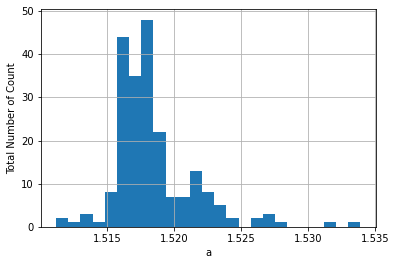

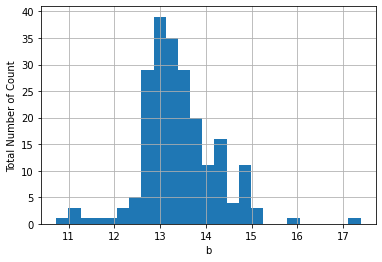

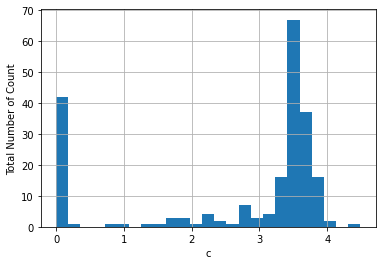

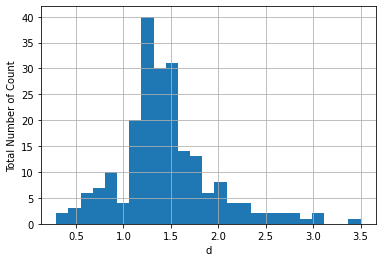

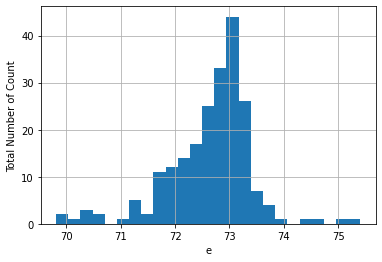

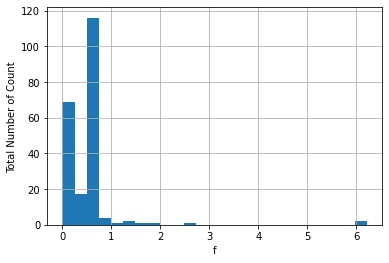

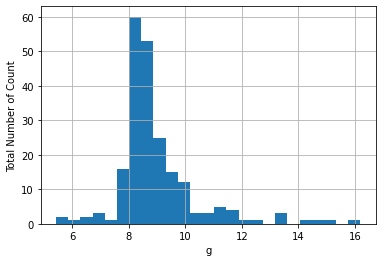

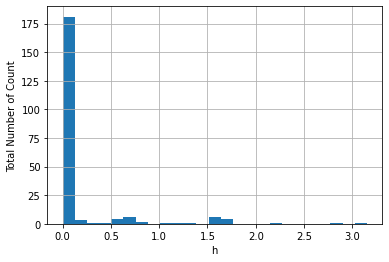

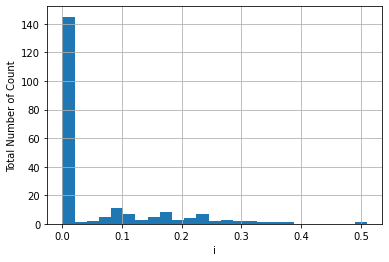

In [9]:
NumericalVariable = [var for var in df.columns if df[var].dtype !='O']  #if dtypes == 'O', it means there is a string or text in this variable

print("The numerical variables are", NumericalVariable)

def graph(data, variable):
    data = data.copy()
    data[variable].hist(bins = 25)
    plt.xlabel(variable)
    plt.ylabel("Total Number of Count")
    plt.show()

for variable in NumericalVariable:
    graph(df, variable)

Based on the histogram (a to i) above, noticed that there are some variables (f, h, i) are highly skewed. So, let's plot some boxplots to visualize it.

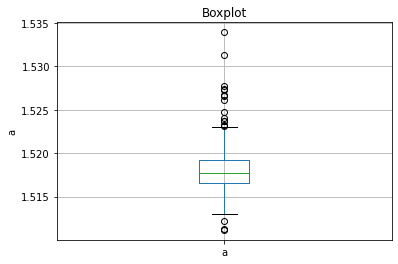

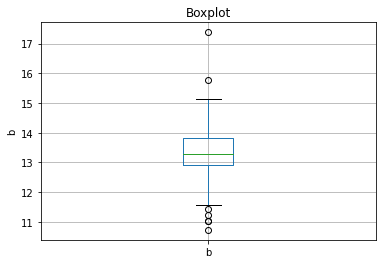

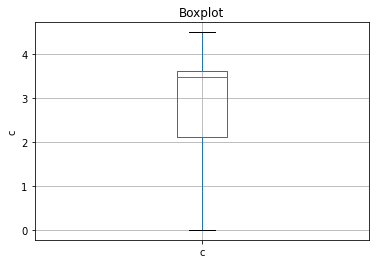

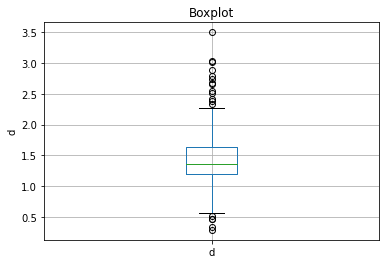

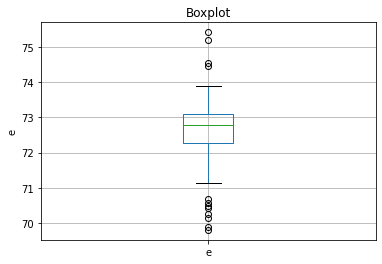

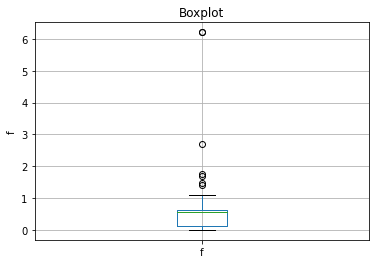

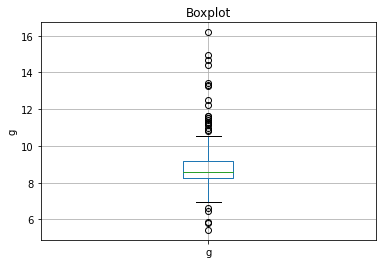

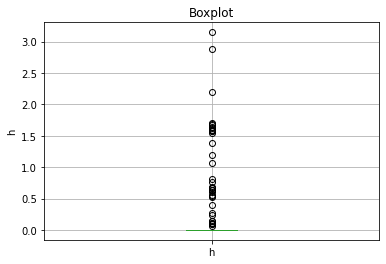

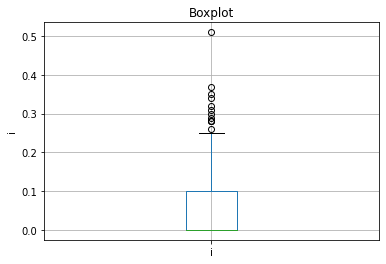

In [10]:
def graph_boxplot(data, variable):
    data = data.copy()
    data.boxplot(column = variable)
    plt.ylabel(variable)
    plt.title('Boxplot')
    plt.show()

for variable in NumericalVariable:
    graph_boxplot(df, variable)

 Interquartile range (IQR) is needed to identify the outliers.

In [11]:
def outliers(data, variable):
    data = data.copy()
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)
    Upper_limit = data[variable].quantile(0.75) + (IQR * 1.5)
    Lower_limit = data[variable].quantile(0.75) - (IQR * 1.5)
    print('Variable', variable, "outliers are values <", Lower_limit, "and >",Upper_limit)

for variable in NumericalVariable:
    outliers(df, variable)

Variable a outliers are values < 1.515205 and > 1.52311
Variable b outliers are values < 12.44875 and > 15.201249999999998
Variable c outliers are values < 1.3724999999999996 and > 5.827500000000001
Variable d outliers are values < 0.97 and > 2.29
Variable e outliers are values < 71.87625 and > 74.29875000000001
Variable f outliers are values < -0.12124999999999997 and > 1.34125
Variable g outliers are values < 7.773750000000001 and > 10.57125
Variable h outliers are values < 0.0 and > 0.0
Variable i outliers are values < -0.05000000000000002 and > 0.25


Summary:

The value falls outside the range will be the outliers.

In [20]:
correlation = df.corr() ## To display the correlation between variables.
correlation

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


<AxesSubplot:>

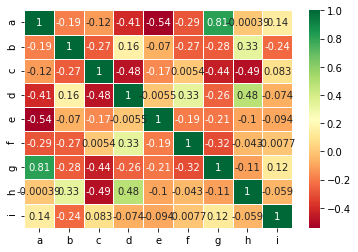

In [21]:
sns.heatmap(correlation, annot=True,cmap='RdYlGn',linewidths=0.5)

Based on the correlation matrix and heatmap above, there is highly positive correlation between variable 'a' and variable 'g' with the value of 0.810403.
Besides that, there is highly negative correlation between variable 'a' and variable 'e' with the value of -0.542052

Question 1c：Clustering test using K-means

In [13]:
#import library
from sklearn.cluster import KMeans

In [14]:
y = df.iloc[:] # select all columns
y

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22


In this part, Within-Cluster-Sum-of-Squares (WCSS) and Elbow method will be use in to select the suitable number of clusters.

Text(0, 0.5, 'WCSS')

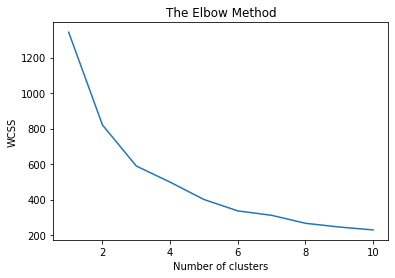

In [15]:
WCSS = []
no_clusters = range(1, 11)

for Number in no_clusters:
    kmeans = KMeans(Number)
    kmeans.fit(y)
    WCSS_iter = kmeans.inertia_  #Sum of squared distances of samples to their closest cluster center
    WCSS.append(WCSS_iter)

plt.plot(no_clusters,WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Based on the graph above, it shows that the distinctive number 
of formulations present in the dataset should be 3 clusters.

In [16]:

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
prediction = kmeans.fit_predict(y) # return which cluster should the observation belongs to. 
prediction

array([1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

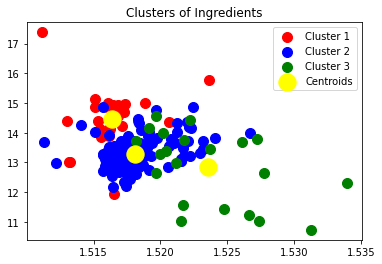

In [17]:
#Visualizing the clusters
plt.scatter(y.iloc[prediction==0, 0], y.iloc[prediction==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(y.iloc[prediction==1, 0], y.iloc[prediction==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(y.iloc[prediction==2, 0], y.iloc[prediction==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids' )
plt.title("Clusters of Ingredients")
plt.legend()